Making a new frame...
Making stamps...
Stamps made.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 0 interior frames.
Initialising...
Initialisation complete!
Frame built!
Frame made.
Reporting...
Analysing...
Analysis complete!
avTemp 0.45
modeltime 0.0E+00
Nu 1.0
step 0
surfVRMS 339.93
VRMS 294.50
fig



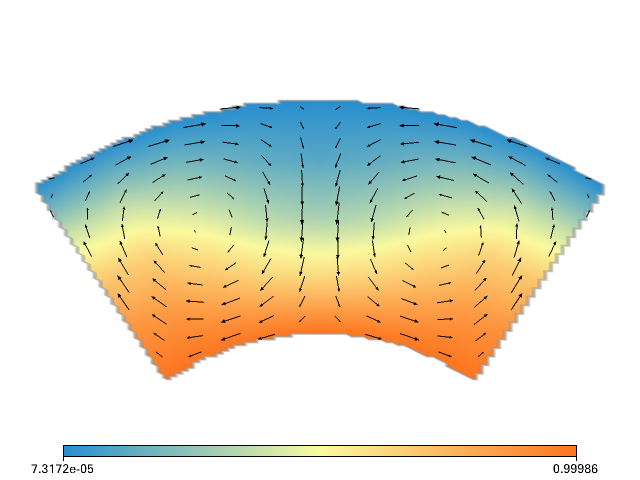

Reporting complete!
Collecting...
No pre-existing directory for this model found. Making a new one...
Checkpointing...
Making checkpoint directory.
Saving figures...
Figures saved.
Saving vars of state...
Saving substrate to disk: 
mesh
Saving var to disk: 
temperatureField
Saved.
Saving snapshot...
Snapshot saved.
Saving stamps...
Stamps saved.
Saving datasets...
Datasets saved.
Checkpointed!
Archiving...
../pemod_puerperium-outrock
Deleting model directory...
Model directory deleted.
Archived!
Running...
Done!
Unarchiving...
Deleting archive...
Model directory deleted.
Unarchived!
Checkpoint already exists! Skipping.
Archiving...
../pemod_puerperium-outrock
Deleting model directory...
Model directory deleted.
Archived!
Reporting...
avTemp 0.45
modeltime 0.0E+00
Nu 1.0
step 0
surfVRMS 339.93
VRMS 294.50
fig



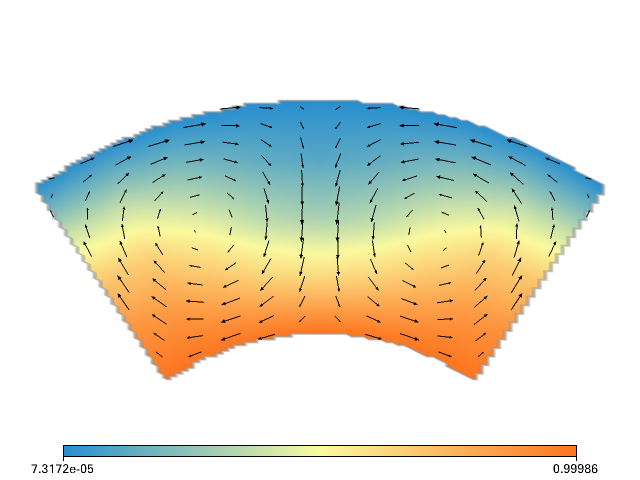

Reporting complete!
Loading checkpoint...
Already at step 0: aborting load_checkpoint.
Making a new frame...
Making stamps...
Stamps made.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 1 interior frames.
Initialising...
Mapping achieved at tolerance = 0.006006802353314534
Initialisation complete!
Frame built!
Frame made.
Reporting...
Analysing...
Analysis complete!
avTemp 0.45
modeltime 0.0E+00
Nu 1.0
step 0
surfVRMS 3497.66
VRMS 3139.16
fig



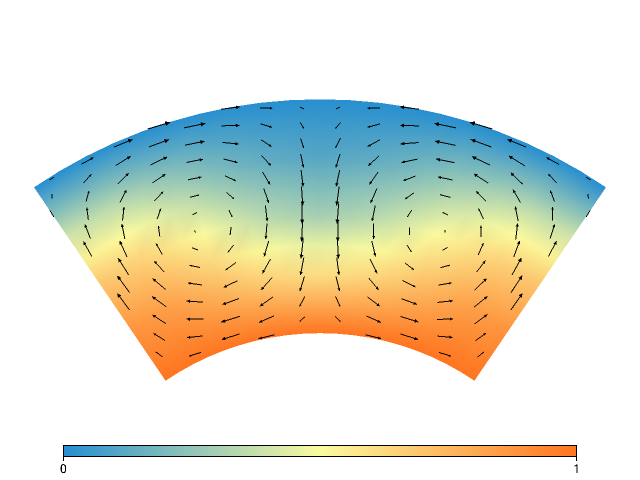

Reporting complete!
Collecting...
No pre-existing directory for this model found. Making a new one...
Unarchiving...
Deleting archive...
Model directory deleted.
Unarchived!
No pre-existing directory for this model found. Making a new one...
Checkpointing...
Making checkpoint directory.
Saving figures...
Figures saved.
Saving vars of state...
Saving substrate to disk: 
mesh
Saving var to disk: 
temperatureField
Saved.
Saving snapshot...
Snapshot saved.
Saving stamps...
Stamps saved.
Checkpointed!
Archiving...
../pemod_puerperium-outrock
Deleting model directory...
Model directory deleted.
Archived!
Checkpointing...
Making checkpoint directory.
Saving figures...
Figures saved.
Saving vars of state...
Saving substrate to disk: 
mesh
Saving var to disk: 
temperatureField
Saved.
Saving snapshot...
Snapshot saved.
Saving stamps...
Stamps saved.
Saving datasets...
Datasets saved.
Checkpointed!
Archiving...
../pemod_tondabayashicho-simmeringly
Deleting model directory...
Model directory delet


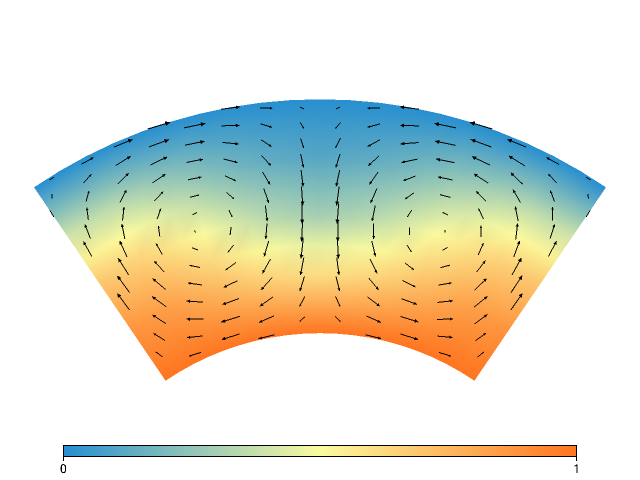

Reporting complete!
Loading checkpoint...
Already at step 0: aborting load_checkpoint.
Making a new frame...
Making stamps...
Stamps made.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 1 interior frames.
Initialising...
Mapping achieved at tolerance = 0.0009723708702586616
Initialisation complete!
Frame built!
Frame made.
Reporting...
Analysing...
Analysis complete!
avTemp 0.45
modeltime 0.0E+00
Nu 1.0
step 0
surfVRMS 35038.42
VRMS 31871.37
fig



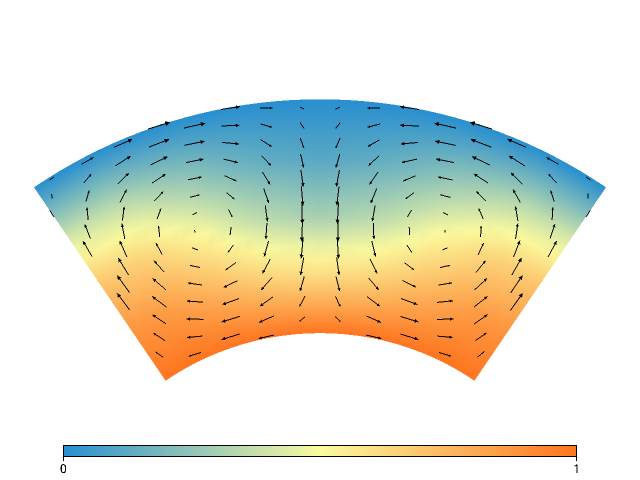

Reporting complete!
Collecting...
No pre-existing directory for this model found. Making a new one...
Unarchiving...
Deleting archive...
Model directory deleted.
Unarchived!
No pre-existing directory for this model found. Making a new one...
No pre-existing directory for this model found. Making a new one...
Checkpointing...
Making checkpoint directory.
Saving figures...
Figures saved.
Saving vars of state...
Saving substrate to disk: 
mesh
Saving var to disk: 
temperatureField
Saved.
Saving snapshot...
Snapshot saved.
Saving stamps...
Stamps saved.
Checkpointed!
Archiving...
../pemod_puerperium-outrock
Nothing to archive yet!
Checkpointing...
Making checkpoint directory.
Saving figures...
Figures saved.
Saving vars of state...
Saving substrate to disk: 
mesh
Saving var to disk: 
temperatureField
Saved.
Saving snapshot...
Snapshot saved.
Saving stamps...
Stamps saved.
Checkpointed!
Archiving...
../pemod_tondabayashicho-simmeringly
Deleting model directory...
Model directory deleted.
Ar


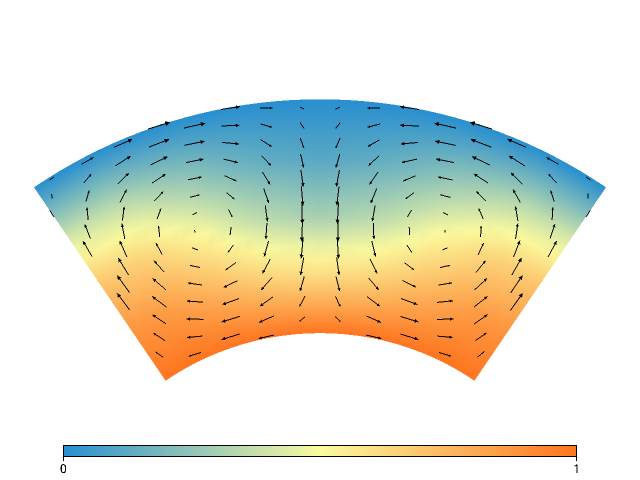

Reporting complete!
Loading checkpoint...
Already at step 0: aborting load_checkpoint.
Making a new frame...
Making stamps...
Stamps made.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 1 interior frames.
Initialising...
Mapping achieved at tolerance = 0.0002438714633303302
Initialisation complete!
Frame built!
Frame made.
Reporting...
Analysing...
Analysis complete!
avTemp 0.45
avVisc 4.0E+03
modeltime 0.0E+00
Nu 1.0
step 0
surfVRMS 18.15
VRMS 153.87
yielding 0%
fig



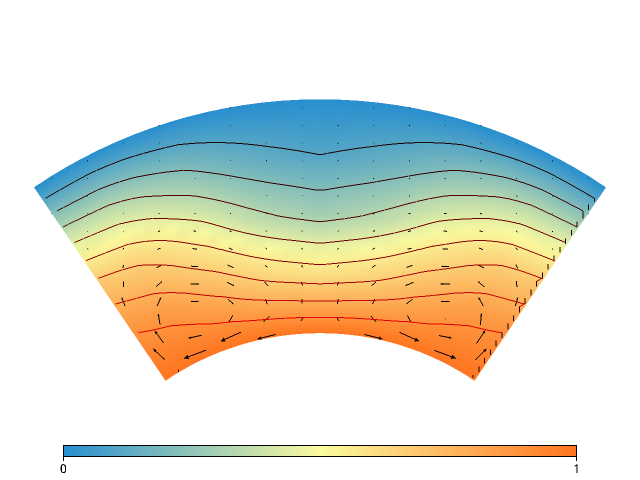

Reporting complete!
Collecting...
No pre-existing directory for this model found. Making a new one...
Unarchiving...
Deleting archive...
Model directory deleted.
Unarchived!
No pre-existing directory for this model found. Making a new one...
No pre-existing directory for this model found. Making a new one...
No pre-existing directory for this model found. Making a new one...
Checkpointing...
Making checkpoint directory.
Saving figures...
Figures saved.
Saving vars of state...
Saving substrate to disk: 
mesh
Saving var to disk: 
temperatureField
Saved.
Saving snapshot...
Snapshot saved.
Saving stamps...
Stamps saved.
Checkpointed!
Archiving...
../pemod_puerperium-outrock
Nothing to archive yet!
Checkpointing...
Making checkpoint directory.
Saving figures...
Figures saved.
Saving vars of state...
Saving substrate to disk: 
mesh
Saving var to disk: 
temperatureField
Saved.
Saving snapshot...
Snapshot saved.
Saving stamps...
Stamps saved.
Checkpointed!
Archiving...
../pemod_tondabayashicho


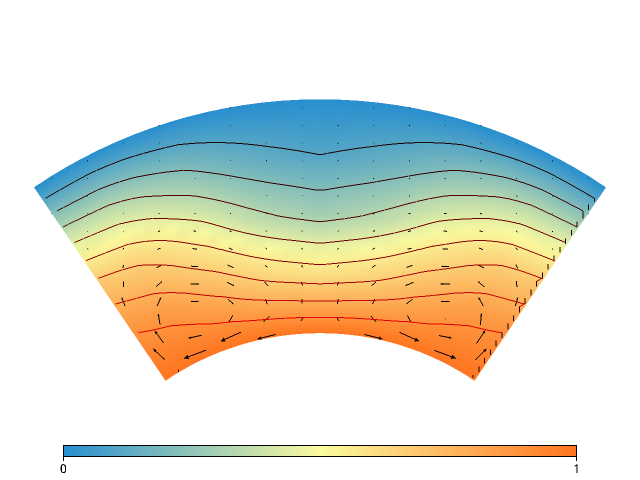

Reporting complete!
Loading checkpoint...
Already at step 0: aborting load_checkpoint.
Making a new frame...
Making stamps...
Stamps made.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 1 interior frames.
Initialising...
Mapping achieved at tolerance = 0.00037038951409555193
Initialisation complete!
Frame built!
Frame made.
Reporting...
Analysing...
Analysis complete!
avTemp 0.45
avVisc 4.0E+03
modeltime 0.0E+00
Nu 1.0
step 0
surfVRMS 10.35
VRMS 157.45
yielding 0%
fig



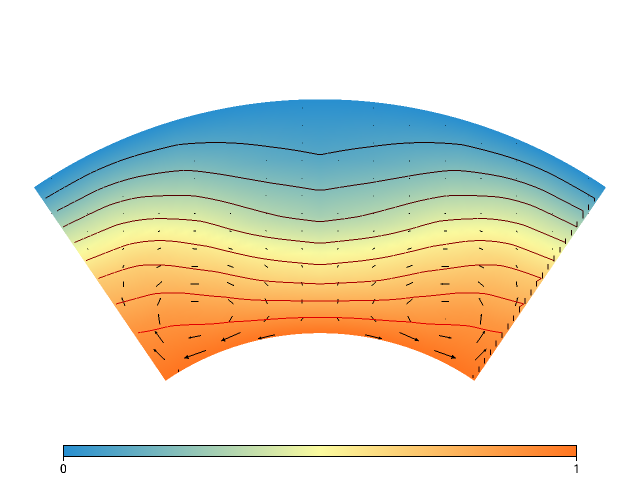

Reporting complete!
Collecting...
No pre-existing directory for this model found. Making a new one...
Unarchiving...
Deleting archive...
Model directory deleted.
Unarchived!
No pre-existing directory for this model found. Making a new one...
No pre-existing directory for this model found. Making a new one...
No pre-existing directory for this model found. Making a new one...
No pre-existing directory for this model found. Making a new one...
Checkpointing...
Making checkpoint directory.
Saving figures...
Figures saved.
Saving vars of state...
Saving substrate to disk: 
mesh
Saving var to disk: 
temperatureField
Saved.
Saving snapshot...
Snapshot saved.
Saving stamps...
Stamps saved.
Checkpointed!
Archiving...
../pemod_puerperium-outrock
Nothing to archive yet!
Checkpointing...
Making checkpoint directory.
Saving figures...
Figures saved.
Saving vars of state...
Saving substrate to disk: 
mesh
Saving var to disk: 
temperatureField
Saved.
Saving snapshot...
Snapshot saved.
Saving stamps.


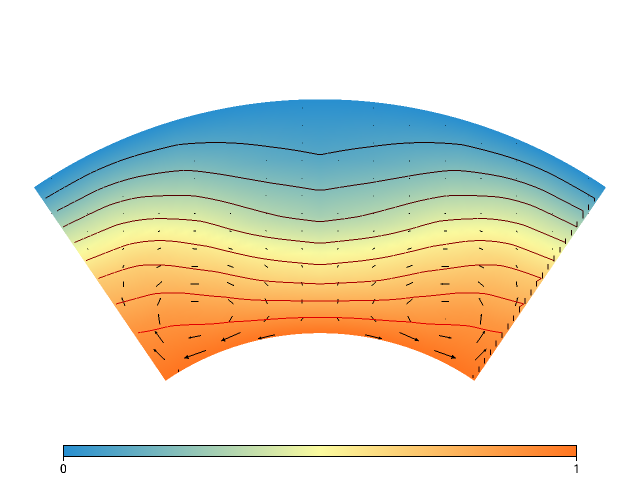

Reporting complete!
Loading checkpoint...
Already at step 0: aborting load_checkpoint.
Making a new frame...
Making stamps...
Stamps made.
Building frame...
Making stamps...
Stamps made.
Doing stuff with the observer...
Observer stuff complete.
Loading interior frames...
Loaded 1 interior frames.
Initialising...
Mapping achieved at tolerance = 0.0
Initialisation complete!
Frame built!
Frame made.
Reporting...
Analysing...
Analysis complete!
avTemp 0.45
avVisc 6.5E+03
modeltime 0.0E+00
Nu 1.0
step 0
surfVRMS 9.17
VRMS 157.06
yielding 0%
fig



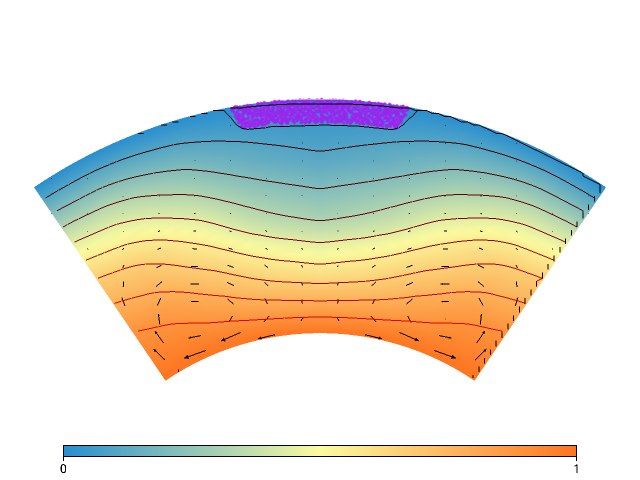

Reporting complete!
Collecting...
No pre-existing directory for this model found. Making a new one...
Unarchiving...
Deleting archive...
Model directory deleted.
Unarchived!
No pre-existing directory for this model found. Making a new one...
No pre-existing directory for this model found. Making a new one...
No pre-existing directory for this model found. Making a new one...
No pre-existing directory for this model found. Making a new one...
No pre-existing directory for this model found. Making a new one...
Checkpointing...
Making checkpoint directory.
Saving figures...
Figures saved.
Saving vars of state...
Saving substrate to disk: 
mesh
Saving var to disk: 
temperatureField
Saved.
Saving snapshot...
Snapshot saved.
Saving stamps...
Stamps saved.
Checkpointed!
Archiving...
../pemod_puerperium-outrock
Nothing to archive yet!
Checkpointing...
Making checkpoint directory.
Saving figures...
Figures saved.
Saving vars of state...
Saving substrate to disk: 
mesh
Saving var to disk: 
tempe


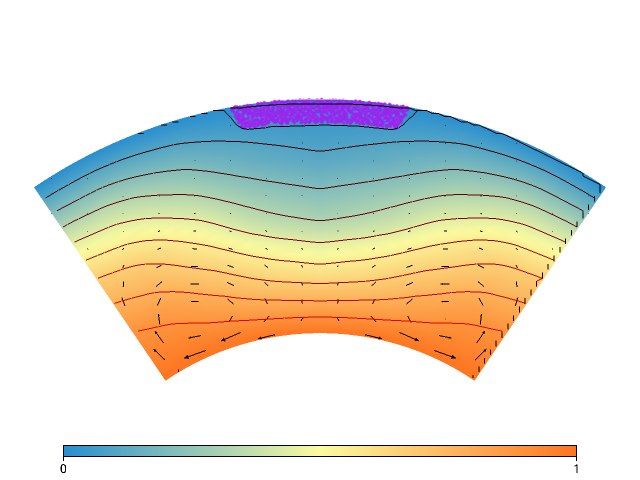

Reporting complete!


In [1]:
import sys
sys.path.append('..')

from planetengine.frame import make_frame
from planetengine import initials
from planetengine import shapes

from modelscripts import isovisc_systemscript
from modelscripts import isovisc_observerscript

steps = 0
res = 1

outputPath = '..' #'/workspace/user_data/data/tests'

isovisc1 = make_frame(
    isovisc_systemscript.build(res = 4 * res, Ra = 1e5, aspect = 2),
    isovisc_observerscript.build(),
    initials = {'temperatureField': {'IC': initials.sinusoidal.IC(freq = 2.)}},
    outputPath = outputPath
    )

isovisc1.report()

checkpointCondition = lambda: any([
    isovisc1.status == 'pre-traverse',
    isovisc1.status == 'post-traverse',
    ])
collectCondition = lambda: False
stopCondition = lambda: isovisc1.step >= steps

isovisc1.traverse(stopCondition, collectCondition, checkpointCondition)

isovisc1.report()

isovisc2 = make_frame(
    isovisc_systemscript.build(res = 8 * res, Ra = 1e6, aspect = 2),
    isovisc_observerscript.build(),
    initials = {'temperatureField': 
        {'IC': initials.load.IC(isovisc1, 'temperatureField'), 'varBounds': [[0., 1.]]}
        },
    outputPath = outputPath
    )

isovisc2.report()

checkpointCondition = lambda: any([
    isovisc2.status == 'pre-traverse',
    isovisc2.status == 'post-traverse',
    ])
collectCondition = lambda: False
stopCondition = lambda: isovisc2.step >= steps

isovisc2.traverse(stopCondition, collectCondition, checkpointCondition)

isovisc2.report()

isovisc3 = make_frame(
    isovisc_systemscript.build(res = 16 * res, Ra = 1e7, aspect = 2),
    isovisc_observerscript.build(),
    initials = {'temperatureField': 
        {'IC': initials.load.IC(isovisc2, 'temperatureField'), 'varBounds': [[0., 1., '.', '.']]}
        },
    outputPath = outputPath
    )

isovisc3.report()

checkpointCondition = lambda: any([
    isovisc3.status == 'pre-traverse',
    isovisc3.status == 'post-traverse',
    ])
collectCondition = lambda: False
stopCondition = lambda: isovisc3.step >= steps

isovisc3.traverse(stopCondition, collectCondition, checkpointCondition)

isovisc3.report()

from modelscripts import MS98_systemscript
from modelscripts import MS98_observerscript

MS98a = make_frame(
    MS98_systemscript.build(res = 16 * res, Ra = 1e7, tau0 = 1e6, aspect = 2),
    MS98_observerscript.build(),
    initials = {'temperatureField': 
        {'IC': initials.load.IC(isovisc3, 'temperatureField'), 'varBounds': [[0., 1., '.', '.']]}
        },
    outputPath = outputPath
    )

MS98a.report()

checkpointCondition = lambda: any([
    MS98a.status == 'pre-traverse',
    MS98a.step % 100 == 0,
    MS98a.status == 'post-traverse',
    ])
collectCondition = lambda: MS98a.step % 10 == 0
stopCondition = lambda: MS98a.step >= 6 * steps

MS98a.traverse(stopCondition, collectCondition, checkpointCondition)

MS98a.report()

MS98b = make_frame(
    MS98_systemscript.build(res = 32 * res, Ra = 1e7, tau0 = 1e6, aspect = 2.),
    MS98_observerscript.build(),
    initials = {'temperatureField': 
        {'IC': initials.load.IC(MS98a, 'temperatureField'), 'varBounds': [[0., 1., '.', '.']]}
        },
    outputPath = outputPath
    )

MS98b.report()

checkpointCondition = lambda: any([
    MS98b.status == 'pre-traverse',
    MS98b.step % 100 == 0,
    MS98b.status == 'post-traverse',
    ])
collectCondition = lambda: MS98b.step % 10 == 0
stopCondition = lambda: MS98b.step >= 6 * steps

MS98b.traverse(stopCondition, collectCondition, checkpointCondition)

MS98b.report()

from modelscripts import MS98X_systemscript
from modelscripts import MS98X_observerscript

MS98X = make_frame(
    MS98X_systemscript.build(res = 32 * res, Ra = 1e7, tau = 1e6, heating = 0., aspect = 2),
    MS98X_observerscript.build(),
    initials = {
        'temperatureField': {'IC': initials.load.IC(MS98b, 'temperatureField'), 'varBounds': [[0., 1., '.', '.']]},
        'materialVar': {'IC': initials.extents.IC((1, shapes.trapezoid(longwidth = 0.3, lengthRatio = 0.9)))}
        },
    outputPath = outputPath
    )

MS98X.report()

checkpointCondition = lambda: any([
    MS98X.status == 'pre-traverse',
    MS98X.step % 1000 == 0,
    MS98X.status == 'post-traverse',
    ])
collectCondition = lambda: MS98X.step % 10 == 0
stopCondition = lambda: MS98X.step >= 30 * steps

MS98X.traverse(stopCondition, collectCondition, checkpointCondition)

MS98X.report()

In [ ]:
import sys
sys.path.append('..')

In [ ]:
import planetengine

In [ ]:
outputPath = '..'

In [ ]:
testFrame = planetengine.frame.load_frame(outputPath, "pemod_spiritualistically-acuan")

In [ ]:
testFrame.report()

In [ ]:
innerFrame = testFrame.inFrames[0].inFrames[0].inFrames[0]

In [ ]:
innerFrame.archived

In [ ]:
innerFrame.unarchive()

In [ ]:
innerFrame.archived

In [ ]:
innerFrame.archive()

In [ ]:
innerFrame.archived

In [ ]:
innerFrame.fork('../testfolder3')

In [ ]:
innerFrame.branch('../testfolder2')

In [ ]:
innerFrame.checkpoint('../testfolder')

In [ ]:
testFrame.fork('../testfolder3')

In [ ]:
import os

In [ ]:
os.makedirs

In [2]:
%%sh

python runscript_001.py

	Global element size: 64x64
	Local offset of rank 0: 0x0
	Local range of rank 0: 64x64
	Global element size: 64x64x64
	Local offset of rank 0: 0x0x0
	Local range of rank 0: 64x64x64
	Global element size: 4x8
	Local offset of rank 0: 0x0
	Local range of rank 0: 4x8
Linear solver (ELSIFCG5__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 7.53403e-05 
  [1] SROpGenerator_SimpleCoarserLevel: time = 7.58171e-05 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.0002022 secs 
  RHS V Solve:            = 0.0003853 secs / 7 its
  Pressure Solve:         = 0.001262 secs / 6 its
  Final V Solve:          = 0.0002007 secs / 7 its

  Total BSSCR Linear solve time: 0.002665 seconds

Linear solver (ELSIFCG5__system-execute), solution time 2.898216e-03 (secs)
	Global element size: 8x20
	Local offset of rank 0: 0x0
	Local range of rank 0: 8x20
	Global e

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
%%sh

mpirun -np 8 python runscript_001.py 2>/dev/null

	Global element size: 64x64
	Local offset of rank 0: 0x0
	Local range of rank 0: 32x16
	Global element size: 64x64x64
	Local offset of rank 0: 0x0x0
	Local range of rank 0: 32x32x32
	Global element size: 4x8
	Local offset of rank 0: 0x0
	Local range of rank 0: 2x2
Linear solver (JYUN42G2__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 
AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000000

SROpGenerator_SimpleFinestLevel: time = 5.22137e-04 
  [1] SROpGenerator_SimpleCoarserLevel: time = 3.06129e-04 
  Setting schur_pc to "uw" 


SCR Solver Summary:

  Multigrid setup:        = 0.001022 secs 
  RHS V Solve:            = 0.00145 secs / 8 its
  Pressure Solve:         = 0.004728 secs / 6 its
  Final V Solve:          = 0.0007555 secs / 8 its

  Total BSSCR Linear solve time: 0.010435 seconds

Linear solver (JYUN42G2__system-execute), solution time 1.105905e-02 (secs)
	Global element size: 8x20
	Local offset of rank 0: 0x0
	Local range of rank 0: 4x5
	Global eleme

In [ ]:
# %%sh

# rm -rf pemod*
# rm Figure_*